# Set working directory and import modules

In [1]:
import json
import os
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('..')
import main
from fitness.program_synthesis.program_synthesis import FindCharacters, FindCharactersSymbolicExecution

# Run program synthesis

In [2]:
data_file = "tests/program_synthesis/FindCharacters.json"
with open(data_file, "r") as f:
    data = json.load(f)

program_synthesis = FindCharacters(data["train"], "")
code = """
    res0 = 0
    for i in inputs:
        if i == "a" or i == "b":
            res0 = res0 + 1
    return res0
    """
result = program_synthesis.run(code)
print(result)
assert (sum(result) == 100, result)

Run program:

def fcn(inputs):
    
    res0 = 0
    for i in inputs:
        if i == "a" or i == "b":
            res0 = res0 + 1
    return res0
    
outcomes = evaluate_exemplars(inputs, outputs, fcn)
            
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-2-3badd7654537>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (sum(result) == 100, result)


# Run the heuristic search

In [3]:
out_path = 'tmp'
# Set to use the configuration file and output directory
args = ["-o", out_path, "-f", "tests/configurations/program_synthesis.yml"]
_ = main.main(args)

Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 100, 'elite_size': 1, 'generations': 3, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/program_synthesis.bnf', 'fitness_function': {'name': 'fitness.fitness.ProgramSynthesis', 'data': 'tests/program_synthesis/FindCharacters.json', 'synthesis_problem': 'fitness.program_synthesis.program_synthesis.FindCharacters', 'code_template_path': 'tests/program_synthesis/code_template.txt'}, 'output_dir': 'tmp', 'coev': False}
Run program:
def fcn(inputs):
    res0 = 0
    for i in inputs:
        if i == 'g' or i == 'c':
            res0 = res0 + 1
    return res0

outcomes = evaluate_exemplars(inputs, outputs, fcn)

Run program:
def fcn(inputs):
    res0 = 0
    for i in inputs:
        if i == 'c' or i == 'a':
            res0 = res0 + 1
    return res0

outcomes = evaluate_exempla

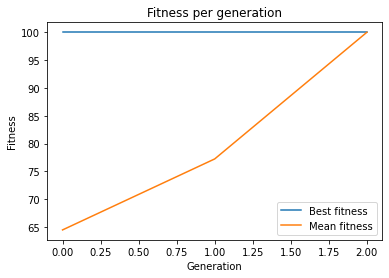

In [4]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness(in_path=out_path, out_path=out_path)

# Run program synthesis with symbolic execution

In [5]:
program_synthesis = FindCharactersSymbolicExecution(data["train"], "")
code = """
        self.increment = 1
        res0 = 0
        for i in inputs:
            if i == "a" or i == "b":
                res0 = res0 + self.increment
        return res0
    """
result = program_synthesis.run(code)
print(result)
assert sum(result) == 100

Run program:

class Cls:
    def __init__(self):
        self.increment = 0
    def fcn(self, inputs):
        
        self.increment = 1
        res0 = 0
        for i in inputs:
            if i == "a" or i == "b":
                res0 = res0 + self.increment
        return res0
    
    def run(self, inputs, outputs):
        self.outcomes = evaluate_exemplars(inputs, outputs, self)
        return self.outcomes
instance = Cls()
outcomes = instance.run(inputs, outputs)

From exec:
Solver model:[]

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

# Run the heuristic search

In [6]:
# Set to use the configuration file and output directory
args = ["-o", out_path, "-f", "tests/configurations/program_synthesis_symbolic_execution.yml"]
_ = main.main(args)

Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 10, 'max_length': 10, 'elite_size': 1, 'generations': 3, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/program_synthesis_symbolic_execution.bnf', 'fitness_function': {'name': 'fitness.fitness.ProgramSynthesis', 'data': 'tests/program_synthesis/FindCharacters.json', 'synthesis_problem': 'fitness.program_synthesis.program_synthesis.FindCharactersSymbolicExecution', 'code_template_path': 'tests/program_synthesis/code_template_symbolic_execution.txt'}, 'output_dir': 'tmp', 'coev': False}
Run program:
class Cls:

    def __init__(self, increment):
        self.increment = increment

    def fcn(self, inputs):
        res0 = 0
        for i in inputs:
            if i == "a" or i == "b":
                res0 = res0 + self.increment
        return res0


    def run(self, inputs, outputs):
    

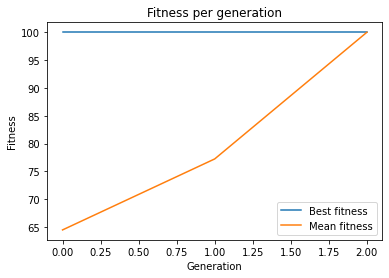

In [4]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness(out_path=out_path, in_path=out_path)